# **Import Library**

In [ ]:
import pandas as pd #mengimpor library pandas yang digunakan untuk manipulasi dan analisis data
import numpy as np #mengimpor library numpy yang digunakan untuk komputasi numerik dan manipulasi array
import seaborn as sns #mengimpor library seaborn yang digunakan untuk visualisasi data
import matplotlib.pyplot as plt #digunakan untuk membuat plot dan visualisasi
from sklearn.model_selection import train_test_split #membagi dataset menjadi training dan testing
from sklearn.preprocessing import MinMaxScaler #digunakan untuk pengskalaan fitur
from sklearn.ensemble import RandomForestClassifier #digunakan untuk membangun model Random Forest
from sklearn.tree import DecisionTreeClassifier #digunakan untuk membangun model Decision Tree
from sklearn.linear_model import LogisticRegression #digunakan untuk membangun model logistic regression
from sklearn.svm import SVC #digunakan untuk membangun model supoort vector machine
from sklearn.neighbors import KNeighborsClassifier #digunakan untuk membangun model K-Neighbors classifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #digunakan untuk mengimpor matrix evaluasi
from sklearn.model_selection import cross_val_score #digunakan untuk validasi model
from sklearn.model_selection import learning_curve #digunakan untuk membuat learning curve
from sklearn.model_selection import GridSearchCV #digunakan untuk hyperparameter grid search
from sklearn.model_selection import StratifiedKFold #digunakan untuk validasi kfold dan memastikan keseimbangan kelas
from sklearn.metrics import roc_curve, roc_auc_score #digunakan untuk menghitung kurva ROC dan AUC (Area Under the Curve) dalam mengevaluasi kinerja model

# **DATA PREPROCESSING**

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#mengecek apakah ada nilai yang null
df.isnull().sum()
#karena tidak nilai yang null kita lanjut ketahap berikutnya

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

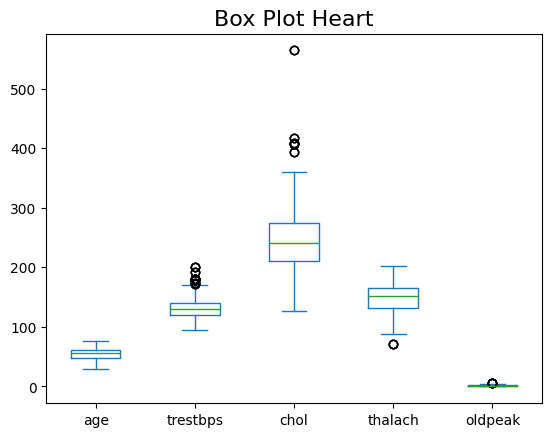

In [ ]:
#mengecek apakah ada outlier
columns_to_plot = ['age',	'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_plot].plot(kind='box')
plt.title('Box Plot Heart', size=16)
plt.show()
#karena terlihat di box plot terdapat beberapa outlier maka kita bersihkan dulu outliernya

In [ ]:
import numpy as np
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1, Q3 = np.percentile(datacolumn, [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [ ]:
lowerbound, upperbound = outlier_treatment(df.trestbps)
print("lowerbound(Q1) : {0}\nUpperbound (Q3):{1}".format(lowerbound,upperbound))
print("outlier data in data set: {} rows. \n" .format(len(df[(df.trestbps < lowerbound) | ( df.trestbps>upperbound)])))

df[(df.trestbps < lowerbound) | (df.trestbps > upperbound)]

lowerbound(Q1) : 90.0
Upperbound (Q3):170.0
outlier data in data set: 30 rows. 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
229,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
257,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [ ]:
#drop outliernya
df.drop(df[(df.trestbps < lowerbound) | (df.trestbps > upperbound)].index , inplace = True)

In [ ]:
lowerbound, upperbound = outlier_treatment(df.chol)
print("lowerbound(Q1) : {0}\nUpperbound (Q3):{1}".format(lowerbound,upperbound))
print("outlier data in data set: {} rows. \n" .format(len(df[(df.chol < lowerbound) | ( df.chol>upperbound)])))

df[(df.chol < lowerbound) | (df.chol > upperbound)]

lowerbound(Q1) : 115.25
Upperbound (Q3):369.25
outlier data in data set: 16 rows. 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
542,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
578,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


In [ ]:
df.drop(df[(df.chol < lowerbound) | (df.chol > upperbound)].index , inplace = True)

In [ ]:
lowerbound, upperbound = outlier_treatment(df.oldpeak)
print("lowerbound(Q1) : {0}\nUpperbound (Q3):{1}".format(lowerbound,upperbound))
print("outlier data in data set: {} rows. \n" .format(len(df[(df.oldpeak < lowerbound) | ( df.oldpeak>upperbound)])))

df[(df.oldpeak < lowerbound) | (df.oldpeak > upperbound)]

lowerbound(Q1) : -2.4000000000000004
Upperbound (Q3):4.0
outlier data in data set: 14 rows. 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
150,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
393,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
482,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
526,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
613,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [ ]:
df.drop(df[(df.oldpeak < lowerbound) | (df.oldpeak > upperbound)].index , inplace = True)

In [ ]:
lowerbound, upperbound = outlier_treatment(df.thalach)
print("lowerbound(Q1) : {0}\nUpperbound (Q3):{1}".format(lowerbound,upperbound))
print("outlier data in data set: {} rows. \n" .format(len(df[(df.thalach < lowerbound) | ( df.thalach>upperbound)])))

df[(df.thalach < lowerbound) | (df.thalach > upperbound)]

lowerbound(Q1) : 78.0
Upperbound (Q3):222.0
outlier data in data set: 4 rows. 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
378,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [ ]:
df.drop(df[(df.thalach < lowerbound) | (df.thalach > upperbound)].index , inplace = True)

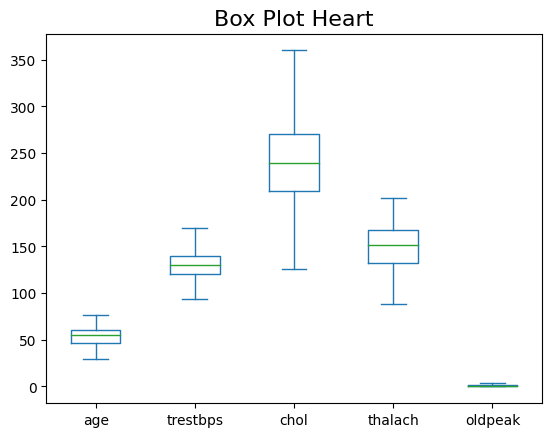

In [ ]:
columns_to_plot = ['age',	'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_plot].plot(kind='box')
plt.title('Box Plot Heart', size=16)
plt.show()

(14.5, -0.5)

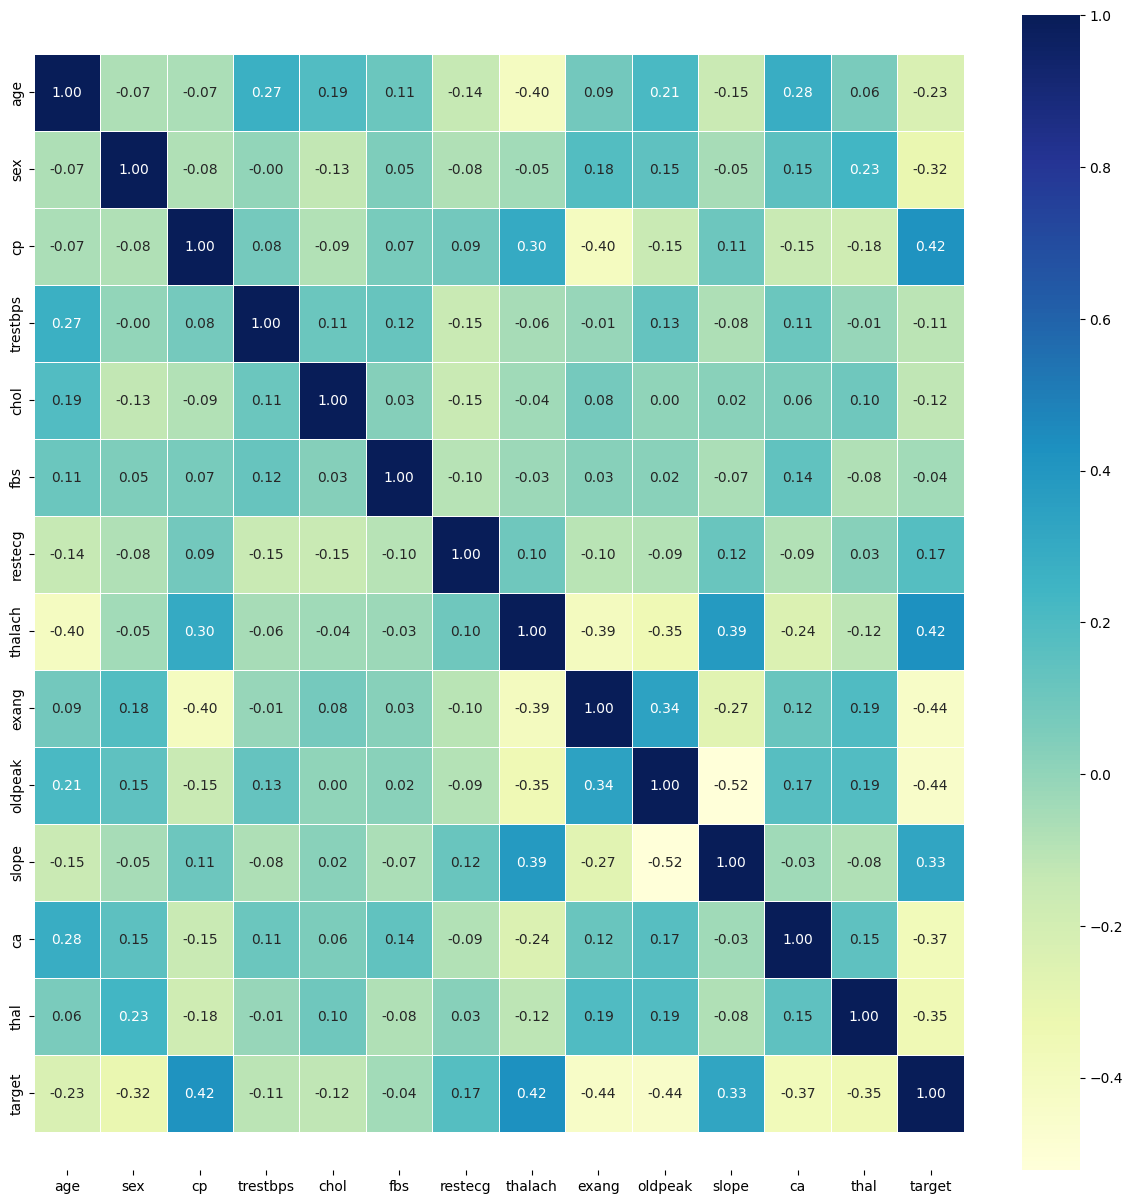

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# **Pemilihan model dan pembagian model menjadi data trainig dan data testing**

In [ ]:
X = df.drop(columns=['target'])
Y = df['target']
#digunakan untuk memisahkan fitur(variabel independen) dan target(variabel dependen)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
#digunakan untuk pengskalaan fitur melalui min-max scalling

In [ ]:
#membagi menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

# **Support Vector Machine(SVM)**


SVM cocok untuk "Heart Disease Dataset" karena dapat menangani kelas kompleks dan non-linear, efektif pada ruang fitur tinggi, toleran terhadap overfitting, dan dapat bekerja dengan baik pada sampel data terbatas, serta dapat diterapkan pada masalah klasifikasi biner maupun multikelas.

In [ ]:
# Inisialisasi dan latih model SVC
model_svc = SVC(kernel='poly')
model_svc.fit(X_train, y_train)

SVC(kernel='poly')


Kernel poly digunakan untuk menangani hubungan non-linier antara fitur dan target dalam klasifikasi. Dengan memproyeksikan data ke dimensi yang lebih tinggi, memungkinkan pemisahan kelas dengan batas keputusan yang kompleks menjadi lebih mudah.

In [ ]:
# Melakukan prediksi pada data training
svc_predicted_train = model_svc.predict(X_train)

# Melakukan prediksi pada data testing
svc_predicted_test = model_svc.predict(X_test)

# Menghitung confusion matrix untuk data training
svc_conf_matrix_train = confusion_matrix(y_train, svc_predicted_train)

# Menampilkan confusion matrix untuk data training
print("Confusion Matrix (Data Training):")
print(svc_conf_matrix_train)
print("\n")

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data training
print("Classification Report (Data Training):")
print(classification_report(y_train, svc_predicted_train))

# Menghitung akurasi model untuk data training
svc_acc_score_train = accuracy_score(y_train, svc_predicted_train)

# Menampilkan akurasi model untuk data training
print("Nilai Akurasi untuk model Support Vector Classifier (Data Training):", svc_acc_score_train * 100, '%\n')

# Menghitung confusion matrix untuk data testing
svc_conf_matrix_test = confusion_matrix(y_test, svc_predicted_test)

# Menampilkan confusion matrix untuk data testing
print("Confusion Matrix (Data Testing):")
print(svc_conf_matrix_test)
print("\n")

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data testing
print("Classification Report (Data Testing):")
print(classification_report(y_test, svc_predicted_test))

# Menghitung akurasi model untuk data testing
svc_acc_score_test = accuracy_score(y_test, svc_predicted_test)

# Menampilkan akurasi model untuk data testing
print("Nilai Akurasi untuk model Support Vector Classifier (Data Testing):", svc_acc_score_test * 100, '%\n')


Confusion Matrix (Data Training):
[[335  27]
 [ 13 393]]


Classification Report (Data Training):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       362
           1       0.94      0.97      0.95       406

    accuracy                           0.95       768
   macro avg       0.95      0.95      0.95       768
weighted avg       0.95      0.95      0.95       768

Nilai Akurasi untuk model Support Vector Classifier (Data Training): 94.79166666666666 %

Confusion Matrix (Data Testing):
[[ 81  10]
 [  2 100]]


Classification Report (Data Testing):
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        91
           1       0.91      0.98      0.94       102

    accuracy                           0.94       193
   macro avg       0.94      0.94      0.94       193
weighted avg       0.94      0.94      0.94       193

Nilai Akurasi untuk model Support Vector Classifier (Data Test

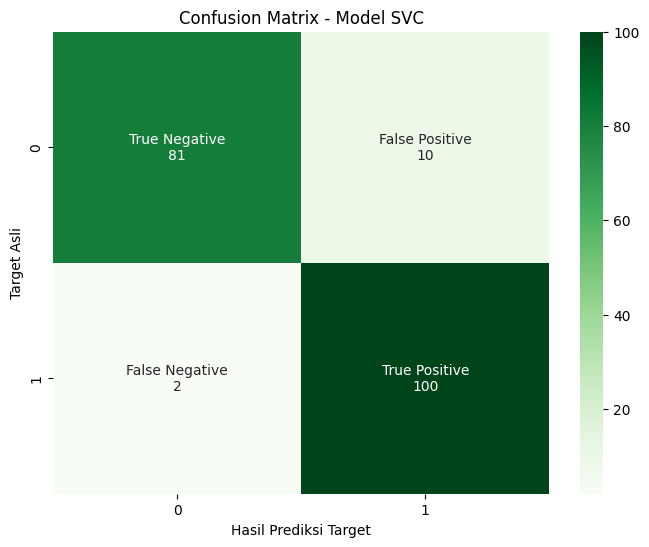

In [ ]:
# Menghitung jumlah TP, TN, FP, FN dari confusion matrix
TP = svc_conf_matrix_test[1, 1]
TN = svc_conf_matrix_test[0, 0]
FP = svc_conf_matrix_test[0, 1]
FN = svc_conf_matrix_test[1, 0]

# Membuat label untuk setiap kotak anotasi
labels = [f'True Negative\n{TN}', f'False Positive\n{FP}', f'False Negative\n{FN}', f'True Positive\n{TP}']

# Heatmap dengan persentase dan label yang sudah diperbaiki
plt.figure(figsize=(8, 6))
sns.heatmap(svc_conf_matrix_test, annot=np.reshape(labels, (2, 2)), fmt='', cmap='Greens', cbar=True)
plt.title("Confusion Matrix - Model SVC")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()


## **Cross Validation**

In [ ]:
cvscore = cross_val_score(model_svc, X_train, y_train, cv =10, scoring = "accuracy")


Fold 10 dipilih karena memberikan estimasi kinerja model yang lebih stabil dan akurat dengan membagi data menjadi 10 bagian yang sama besar untuk pelatihan dan pengujian. Hal ini memberikan gambaran yang seimbang tentang seberapa baik model berperforma pada data baru.

In [ ]:
# Menampilkan nilai cross-validation scores
print("Cross-Validation Scores (10-fold):", cvscore)

# Menampilkan rata-rata dari nilai cross-validation scores
print("Rata-rata Cross-Validation Score:", cvscore.mean())

# Menampilkan standar deviasi dari nilai cross-validation scores
print("Standar Deviasi Cross-Validation Score:", cvscore.std())

Cross-Validation Scores (10-fold): [0.8961039  0.92207792 0.85714286 0.93506494 0.92207792 0.93506494
 0.92207792 0.85714286 0.94736842 0.96052632]
Rata-rata Cross-Validation Score: 0.9154647983595353
Standar Deviasi Cross-Validation Score: 0.03335514146039951


Hasil dari Cross Validation basic menunjukan bahwa model memiliki rata rata akurasi sebesar 91.55% dengan standar deviasi sebesar 3.34%. hal ini menunjukkan bahwa model cenderung konsisten dalam performanya. dengan demikian, dapat disimpulkan bahwa model memiliki performa yang baik dan stabil dalam memprediksi target pada data latih.

## **Learning curves**

In [ ]:
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure() #membuat figur untuk menampilak plot learning
    plt.title("Learning curve model SVC")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

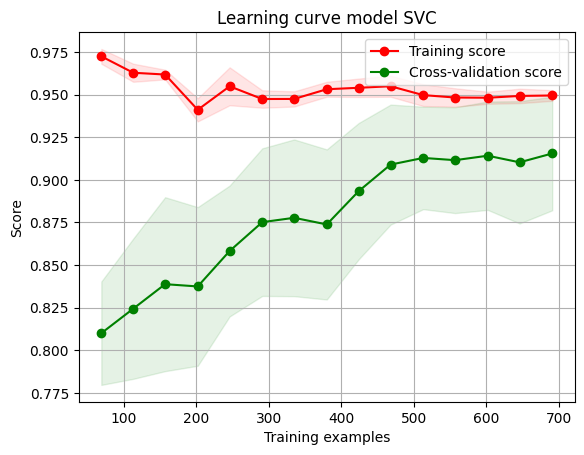

In [ ]:
cv = 10
train_size=np.linspace(.1, 1.0, 15)
Learning_curve_model(X_train, y_train, model_svc, cv, train_size)

berdasarkan Learning Curve tersebut terlihat bahwa garis yang menunjukan training data dan cross validation tidak memiliki jarak yang terlalu jauh dan seiring bertambahnya jumlah data nilai akurasi nya akan semakin dekat. dan nilai akurasi validasi < nilai akurasi training sehingga model tersebut bisa dikatakan **good fit**.

## **Hyperparameter**

In [ ]:
# Hyperparameters yang akan diuji
hyperparameters = {'C': [0.1, 1, 10],
                   'gamma': [1, 0.1, 0.01, 0.001],
                   'kernel': ['linear', 'rbf', 'poly']}

# Inisialisasi Grid Search dengan model SVC dan hyperparameters
grid_search = GridSearchCV(estimator=model_svc, param_grid=hyperparameters, scoring='accuracy', cv=10)

# Melakukan hyperparameter tuning pada data training
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameters terbaik
print("Hyperparameters terbaik:", grid_search.best_params_)

# Menggunakan model dengan hyperparameters terbaik
best_svc = grid_search.best_estimator_

# Prediksi menggunakan model yang telah di-tune
y_pred_tuned_svc = best_svc.predict(X_test)



Hyperparameters terbaik: {'C': 10, 'gamma': 1, 'kernel': 'poly'}


## **Metric Evaluation**

kernel poly memungkinkan model untuk menangani hubungan nonlinier antara variabel input dan target dengan efektif, karena kernel polinomial dapat memetakan data ke ruang fitur yang lebih tinggi.

In [ ]:
model_svc = SVC(kernel= 'poly', C=0.1)
model_svc.fit(X_train, y_train)

SVC(C=0.1, kernel='poly')

In [ ]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_tuned_svc)
print("Akurasi:", accuracy)

# Menghitung dan menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned_svc)
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan classification report
class_report = classification_report(y_test, y_pred_tuned_svc)
print("Classification Report:")
print(class_report)


Akurasi: 1.0
Confusion Matrix:
[[ 91   0]
 [  0 102]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       102

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



berdasarkan Metric evaluation tersebut terlihat bahwa model sesudah dilakukan hyperparameter menjadi overfitting.

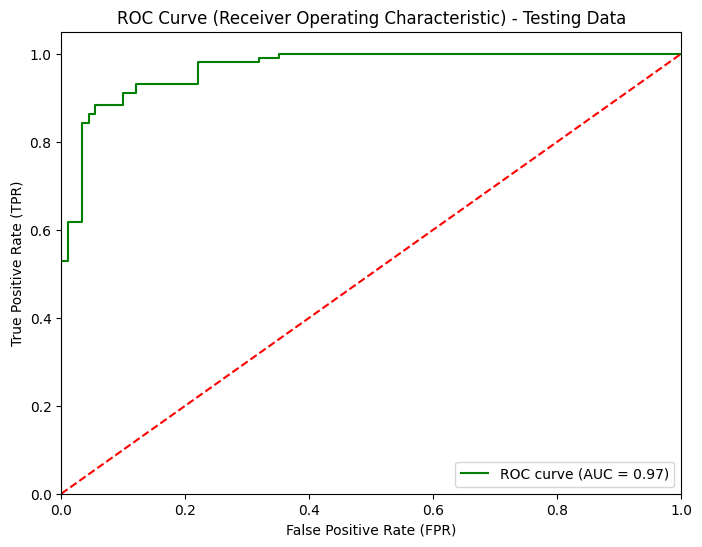

In [ ]:
# Menghitung nilai prediksi probabilitas untuk kelas positif (class 1) pada data testing
y_test_scores = model_svc.decision_function(X_test)

# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk data testing
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores)

# Menghitung AUC untuk data testing
auc_test = roc_auc_score(y_test, y_test_scores)

# Memplot kurva ROC untuk data testing
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', label='ROC curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Receiver Operating Characteristic) - Testing Data')
plt.legend(loc='lower right')
plt.show()


Berdasarkan ROC curve diatas terlihat bahwa model memiliki nilai AUC sebesar 0.97 yang artinya model memiliki performa yang sangat baik dalam membedakan kelas positif dan negatif. hal ini menunjukan model memiliki kemampuan yang baik dalam memprediksi nilai dengan benar.

# **Decision Tree**
Alasan: Cocok untuk menangani interaksi kompleks antar fitur, yang dapat muncul dalam data medis seperti dataset penyakit jantung.

Kelebihan: Mudah diinterpretasi, tidak memerlukan preprocessing data yang kompleks, dapat menangani data kategorikal tanpa perlu encoding, dan mampu menangani hubungan non-linier antar variabel.

In [ ]:
# Inisialisasi Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
# Menggunakan metode fit untuk melatih model pada data training
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [ ]:
# Melakukan prediksi pada data training
dt_predicted_train = dt.predict(X_train)

# Melakukan prediksi pada data testing
dt_predicted_test = dt.predict(X_test)

# Menghitung confusion matrix untuk data training
dt_conf_matrix_train = confusion_matrix(y_train, dt_predicted_train)

# Menghitung confusion matrix untuk data testing
dt_conf_matrix_test = confusion_matrix(y_test, dt_predicted_test)

# Menampilkan confusion matrix untuk data training
print("Confusion Matrix (Data Training):")
print(dt_conf_matrix_train)
print("\n")



# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data training
print("Classification Report (Data Training):")
print(classification_report(y_train, dt_predicted_train))

# Menghitung akurasi model untuk data training
dt_acc_score_train = accuracy_score(y_train, dt_predicted_train)

# Menampilkan akurasi model untuk data training
print("Nilai Akurasi untuk model DecisionTreeClassifier (Data Training):", dt_acc_score_train * 100, '%\n')

# Menampilkan confusion matrix untuk data testing
print("Confusion Matrix (Data Testing):")
print(dt_conf_matrix_test)
print("\n")

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data testing
print("Classification Report (Data Testing):")
print(classification_report(y_test, dt_predicted_test))

# Menghitung akurasi model untuk data testing
dt_acc_score_test = accuracy_score(y_test, dt_predicted_test)

# Menampilkan akurasi model untuk data testing
print("Nilai Akurasi untuk model DecisionTreeClassifier (Data Testing):", dt_acc_score_test * 100, '%\n')


Confusion Matrix (Data Training):
[[346  16]
 [ 32 374]]


Classification Report (Data Training):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       362
           1       0.96      0.92      0.94       406

    accuracy                           0.94       768
   macro avg       0.94      0.94      0.94       768
weighted avg       0.94      0.94      0.94       768

Nilai Akurasi untuk model DecisionTreeClassifier (Data Training): 93.75 %

Confusion Matrix (Data Testing):
[[83  8]
 [12 90]]


Classification Report (Data Testing):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        91
           1       0.92      0.88      0.90       102

    accuracy                           0.90       193
   macro avg       0.90      0.90      0.90       193
weighted avg       0.90      0.90      0.90       193

Nilai Akurasi untuk model DecisionTreeClassifier (Data Testing): 89.6373056994818

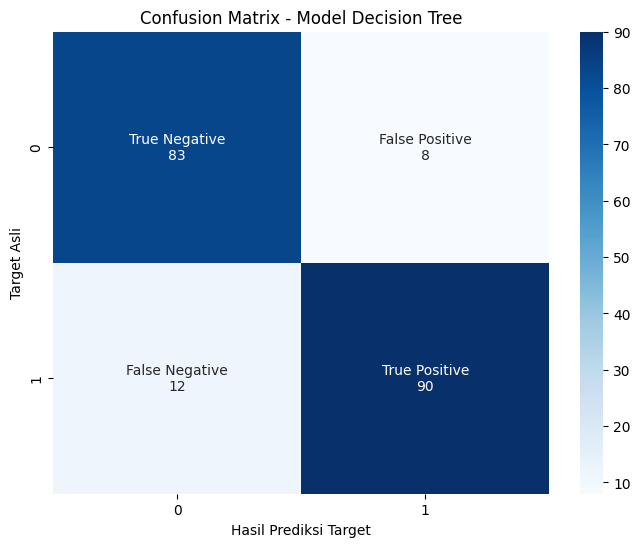

In [ ]:
# Menghitung jumlah TP, TN, FP, FN dari confusion matrix
TP = dt_conf_matrix_test[1, 1]
TN = dt_conf_matrix_test[0, 0]
FP = dt_conf_matrix_test[0, 1]
FN = dt_conf_matrix_test[1, 0]

# Membuat label untuk setiap kotak anotasi
labels = [f'True Negative\n{TN}', f'False Positive\n{FP}', f'False Negative\n{FN}', f'True Positive\n{TP}']

# Heatmap dengan persentase dan label yang sudah diperbaiki
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix_test, annot=np.reshape(labels, (2, 2)), fmt='', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model Decision Tree")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()


## **Cross validation**

In [ ]:
cvscore = cross_val_score(dt, X_train, y_train, cv =10, scoring = "accuracy")

In [ ]:
# Menampilkan nilai cross-validation scores
print("Cross-Validation Scores (10-fold):", cvscore)

# Menampilkan rata-rata dari nilai cross-validation scores
print("Rata-rata Cross-Validation Score:", cvscore.mean())

# Menampilkan standar deviasi dari nilai cross-validation scores
print("Standar Deviasi Cross-Validation Score:", cvscore.std())

Cross-Validation Scores (10-fold): [0.92207792 0.90909091 0.93506494 0.90909091 0.88311688 0.92207792
 0.93506494 0.92207792 0.89473684 0.90789474]
Rata-rata Cross-Validation Score: 0.9140293916609707
Standar Deviasi Cross-Validation Score: 0.0157908883885672


Hasil dari cross validation basic diatas menunjukkan bahwa model memiliki rata rata akurasi sebesar 91.40% dengan standar deviasi sebesar 1.58%, hal ini menunjukkan bahwa model memiliki performa yang relatif stabil dan konsisten. dengan demikian dapat disimpulkan bahwa model mampu secara konsisten memprediksi dengan baik pada data uji.

## **Learning curves**

In [ ]:
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure() #membuat figur untuk menampilkan plot learning
    plt.title("Learning curve model Decision Tree")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

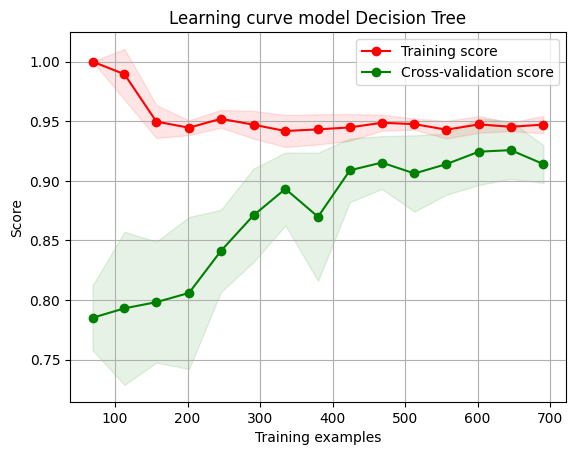

In [ ]:
cv = 10
train_size=np.linspace(.1, 1.0, 15)
Learning_curve_model(X_train, y_train, dt, cv, train_size)

dari learning curve diatas terlihat bahwa diawal training score memiliki nilai yang sangat tinggi dibandingkan validation score, tetapi seiring dengan penambahan jumlah data keduanya akhirnya konvergen ke satu titik. hal ini menunjukkan bahwa model mampu mempelajari data training dengan baik dan generalisasi ke data baru dengan tingkat akurasi yang baik. Jadi berdasarkan Learning Curves diatas model dapat dikatakan **GoodFit**

## **Hyperparameter**

Grid Search

 melakukan pencarian secara sistematis melalui seluruh kombinasi hyperparameter yang telah ditentukan sebelumnya. Ini berarti grid search mencoba setiap kombinasi hyperparameter dalam himpunan nilai yang telah ditentukan, secara berurutan dan dengan interval tertentu.

In [ ]:
hyperparameters = {"max_depth":(5, 15, 30, 50, 65, 80), "max_features":(0.2, 0.4, 0.6, 0.8), "min_samples_split":(2, 5, 8, 10, 20)}

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
opt = GridSearchCV(estimator=dt, param_grid=hyperparameters, cv=skf, scoring="accuracy", n_jobs=-1)

In [ ]:
opt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': (5, 15, 30, 50, 65, 80),
                         'max_features': (0.2, 0.4, 0.6, 0.8),
                         'min_samples_split': (2, 5, 8, 10, 20)},
             scoring='accuracy')

In [ ]:
opt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=0.4,
                       random_state=0)

In [ ]:
opt.best_score_

0.9921736158578263

In [ ]:
opt.best_params_

{'max_depth': 15, 'max_features': 0.4, 'min_samples_split': 2}

In [ ]:
pd.DataFrame(opt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006683,0.006274,0.004433,0.003263,5,0.2,2,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",0.870130,0.805195,...,0.779221,0.870130,0.922078,0.701299,0.818182,0.828947,0.815789,0.826811,0.056952,116
1,0.003249,0.002750,0.003481,0.004626,5,0.2,5,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",0.870130,0.740260,...,0.779221,0.870130,0.870130,0.701299,0.818182,0.789474,0.815789,0.811176,0.055861,117
2,0.005830,0.003557,0.002717,0.002915,5,0.2,8,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",0.870130,0.740260,...,0.779221,0.870130,0.870130,0.701299,0.818182,0.789474,0.815789,0.811176,0.055861,117
3,0.005275,0.004082,0.002225,0.002347,5,0.2,10,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",0.870130,0.740260,...,0.779221,0.870130,0.870130,0.701299,0.818182,0.789474,0.815789,0.811176,0.055861,117
4,0.005281,0.003376,0.001817,0.002070,5,0.2,20,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",0.792208,0.727273,...,0.818182,0.818182,0.870130,0.740260,0.831169,0.789474,0.815789,0.805981,0.043287,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.003264,0.000116,0.001091,0.000137,80,0.8,2,"{'max_depth': 80, 'max_features': 0.8, 'min_sa...",0.974026,0.987013,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.986842,0.986842,0.992174,0.008635,1
116,0.003359,0.000277,0.001084,0.000069,80,0.8,5,"{'max_depth': 80, 'max_features': 0.8, 'min_sa...",0.974026,0.987013,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.973684,0.973684,0.989542,0.011416,16
117,0.003731,0.000533,0.001343,0.000430,80,0.8,8,"{'max_depth': 80, 'max_features': 0.8, 'min_sa...",0.935065,0.948052,...,0.987013,0.974026,0.974026,0.987013,1.000000,0.960526,0.973684,0.971343,0.018207,31
118,0.003794,0.000617,0.001161,0.000320,80,0.8,10,"{'max_depth': 80, 'max_features': 0.8, 'min_sa...",0.935065,0.961039,...,0.987013,0.948052,0.961039,0.987013,0.987013,0.960526,0.973684,0.964850,0.017467,36


In [ ]:
all_results = pd.DataFrame(opt.cv_results_)
all_results[(all_results["param_max_depth"]==15) & (all_results["param_max_features"]==0.8) & (all_results["param_min_samples_split"]==2)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
35,0.00508,0.00283,0.001888,0.002164,15,0.8,2,"{'max_depth': 15, 'max_features': 0.8, 'min_sa...",0.974026,0.987013,...,1.0,1.0,1.0,1.0,1.0,0.986842,0.986842,0.992174,0.008635,1


Randomized Search

melakukan pencarian dengan cara yang acak. Ini berarti randomized search secara acak memilih kombinasi hyperparameter dari distribusi nilai yang telah ditentukan, tanpa harus mencoba semua kombinasi secara berurutan.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hyperparameters = {"max_depth":(5, 15, 30, 50, 65, 80), "max_features":(0.2, 0.1, 0.4, 0.6, 0.8), "min_samples_split":(2, 5, 8, 10, 20)}

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

In [ ]:
opt = RandomizedSearchCV(estimator=dt, param_distributions=hyperparameters, n_iter=50, cv=skf, scoring="accuracy", n_jobs=-1)

In [ ]:
opt.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=5,
                                                    random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': (5, 15, 30, 50, 65, 80),
                                        'max_features': (0.2, 0.1, 0.4, 0.6,
                                                         0.8),
                                        'min_samples_split': (2, 5, 8, 10, 20)},
                   scoring='accuracy')

In [ ]:
opt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=0.8,
                       random_state=0)

In [ ]:
opt.best_score_

0.9921736158578263

In [ ]:
opt.best_params_

{'min_samples_split': 2, 'max_features': 0.8, 'max_depth': 15}

In [ ]:
all_results = pd.DataFrame(opt.cv_results_)
all_results[(all_results["param_max_depth"]==15) & (all_results["param_max_features"]==0.8) & (all_results["param_min_samples_split"]==2)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
7,0.003316,0.000114,0.00101,0.000049,2,0.8,15,"{'min_samples_split': 2, 'max_features': 0.8, ...",0.974026,0.987013,...,1.0,1.0,1.0,1.0,1.0,0.986842,0.986842,0.992174,0.008635,1


## **Metric Evaluation**

In [ ]:
 #Inisialisasi Decision Tree Classifier
 best_model = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)

 #Menggunakan metode fit untuk melatih model pada data training
 best_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

penggunaan max_depth = 6 bertujuan untuk pembatasan kedalaman pohon keputusan. hal ini dilakukan untuk mengontrol kompleksitas model dan mencegah overfitting.

In [ ]:
# Melakukan prediksi pada data testing

y_pred = best_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.9481865284974094
Confusion Matrix:
[[88  3]
 [ 7 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        91
           1       0.97      0.93      0.95       102

    accuracy                           0.95       193
   macro avg       0.95      0.95      0.95       193
weighted avg       0.95      0.95      0.95       193



Dari Metric Evaluasi diatas dapat disimpulkan

nilai akurasi dari model adalah 0.948 yang berarti sekitar 94,8% prediksi yang dilakukan oleh model adalah benar. hal ini meningkat dari nilai sebelumnya yaitu 89.6% karena kita telah melakukan cross validation dan mencari hyperparameter.

sehingga berdasarkan hasil dari akurasi model dan hasil lain dari metrik evaluasi seperti precision, F-1score dan support dapat disimpulkan model memiliki kinerja yang baik dalam memprediksi kelas target.



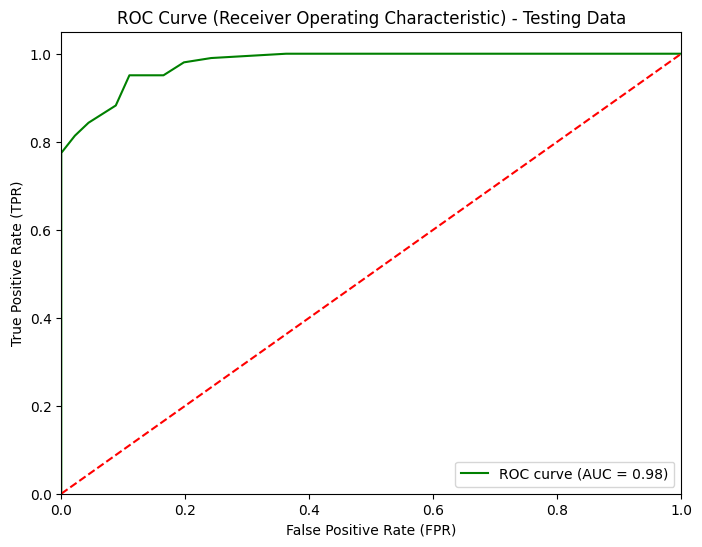

In [ ]:
# Menghitung nilai prediksi probabilitas untuk kelas positif (class 1) pada data testing
y_test_scores = dt.predict_proba(X_test)[:, 1]

# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk data testing
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores)

# Menghitung AUC untuk data testing
auc_test = roc_auc_score(y_test, y_test_scores)

# Memplot kurva ROC untuk data testing
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', label='ROC curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Receiver Operating Characteristic) - Testing Data')
plt.legend(loc='lower right')
plt.show()


berdasarkan ROC curve diatas terlihat bahwa ROC memiliki nilai AUC sebesar 0.98 ini menunjukkan bahwa model memiliki kinerja yang sangat baik dalam memisahkan kelas positif dan negatif, yang ditunjukkan oleh AUC score yang mendekati 1.

# **Random Forest**
Alasan: Merupakan pengembangan dari Decision Trees yang mampu mengatasi masalah overfitting dengan menggabungkan banyak pohon keputusan.

Kelebihan: Mampu menangani interaksi kompleks, memperbaiki masalah overfitting yang sering muncul pada Decision Trees, serta memberikan estimasi keandalan prediksi melalui penggunaan banyak pohon.

In [ ]:
# Inisialisasi Random Forest Classifier
rf = RandomForestClassifier(max_depth=5, random_state=42)

# Melatih model pada data training
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Melakukan prediksi pada data training
rf_predicted_train = rf.predict(X_train)

# Melakukan prediksi pada data testing
rf_predicted_test = rf.predict(X_test)

# Menghitung confusion matrix untuk data training
rf_conf_matrix_train = confusion_matrix(y_train, rf_predicted_train)

# Menghitung confusion matrix untuk data testing
rf_conf_matrix_test = confusion_matrix(y_test, rf_predicted_test)

# Menampilkan confusion matrix untuk data training
print("Confusion Matrix (Data Training):")
print(rf_conf_matrix_train)
print("\n")

# Menghitung akurasi model untuk data training
rf_acc_score_train = accuracy_score(y_train, rf_predicted_train)

# Menampilkan akurasi model untuk data training
print("Accuracy of Random Forest Classifier (Data Training):", rf_acc_score_train * 100, '%\n')


# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data training
print("Classification Report (Data Training):")
print(classification_report(y_train, rf_predicted_train))

# Menampilkan confusion matrix untuk data testing
print("Confusion Matrix (Data Testing):")
print(rf_conf_matrix_test)
print("\n")

# Menghitung akurasi model untuk data testing
rf_acc_score_test = accuracy_score(y_test, rf_predicted_test)

# Menampilkan akurasi model untuk data testing
print("Accuracy of Random Forest Classifier (Data Testing):", rf_acc_score_test * 100, '%\n')

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data testing
print("Classification Report (Data Testing):")
print(classification_report(y_test, rf_predicted_test))


Confusion Matrix (Data Training):
[[334  28]
 [  9 397]]


Accuracy of Random Forest Classifier (Data Training): 95.18229166666666 %

Classification Report (Data Training):
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       362
           1       0.93      0.98      0.96       406

    accuracy                           0.95       768
   macro avg       0.95      0.95      0.95       768
weighted avg       0.95      0.95      0.95       768

Confusion Matrix (Data Testing):
[[82  9]
 [ 3 99]]


Accuracy of Random Forest Classifier (Data Testing): 93.78238341968913 %

Classification Report (Data Testing):
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        91
           1       0.92      0.97      0.94       102

    accuracy                           0.94       193
   macro avg       0.94      0.94      0.94       193
weighted avg       0.94      0.94      0.94       193



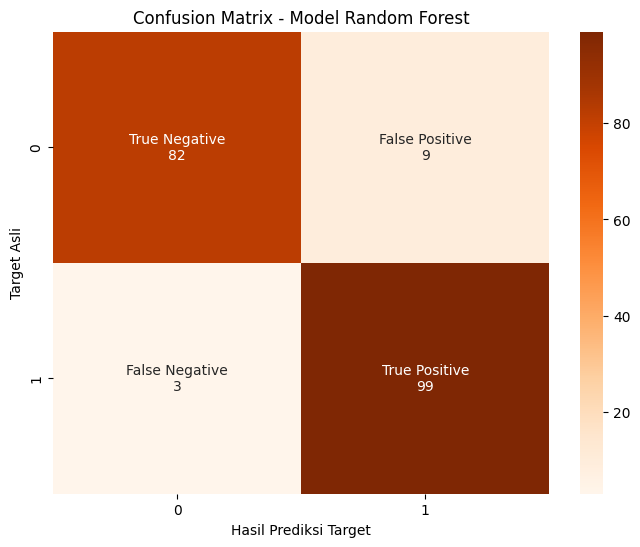

In [ ]:
# Menghitung jumlah TP, TN, FP, FN dari confusion matrix
TP = rf_conf_matrix_test[1, 1]
TN = rf_conf_matrix_test[0, 0]
FP = rf_conf_matrix_test[0, 1]
FN = rf_conf_matrix_test[1, 0]

# Membuat label untuk setiap kotak anotasi
labels = [f'True Negative\n{TN}', f'False Positive\n{FP}', f'False Negative\n{FN}', f'True Positive\n{TP}']

# Heatmap dengan persentase dan label yang sudah diperbaiki
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix_test, annot=np.reshape(labels, (2, 2)), fmt='', cmap='Oranges', cbar=True)
plt.title("Confusion Matrix - Model Random Forest")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()


## **Cross validation**

In [ ]:
cvscore = cross_val_score(rf, X_train, y_train, cv =10, scoring = "accuracy")

In [ ]:
# Menampilkan nilai cross-validation scores
print("Cross-Validation Scores (10-fold):", cvscore)

# Menampilkan rata-rata dari nilai cross-validation scores
print("Rata-rata Cross-Validation Score:", cvscore.mean())

# Menampilkan standar deviasi dari nilai cross-validation scores
print("Standar Deviasi Cross-Validation Score:", cvscore.std())

Cross-Validation Scores (10-fold): [0.92207792 0.90909091 0.84415584 0.93506494 0.93506494 0.97402597
 0.90909091 0.81818182 0.96052632 0.93421053]
Rata-rata Cross-Validation Score: 0.914149008885851
Standar Deviasi Cross-Validation Score: 0.04608286360405404


Hasil dari cross validation basic diatas menunjukkan bahwa model memiliki rata rata akurasi sebesar 91.41% dengan standar deviasi sebesar 4.61%. hal ini menunjukkan bahwa model memiliki performa yang relatif stabil dan konsisten. dengan demikian dapat disimpulkan bahwa model mampu secara konsisten memprediksi dengan baik pada data uji.

## **Learning Curves**

In [ ]:
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure() #membuat figur untuk menampilak plot learning
    plt.title("Learning curve model Random Forest")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

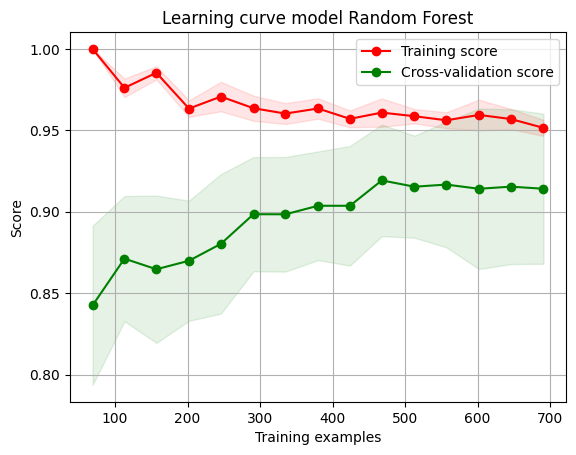

In [ ]:
cv = 10
train_size=np.linspace(.1, 1.0, 15)
Learning_curve_model(X_train, y_train, rf, cv, train_size)

Berdasarkan learning curves diatas terlihat bahwa training score memiliki nilai diatas 0.95 yang menunjukkan bahwa model memiliki kinerja yang sangat baik, sementara itu Cross validation menunjukkan angka dibawah 0.85 yang menunjukkan model sedikit mengalami overfitting. namun seiring bertambahnya jumlah data kurva tersebut menuju ke arah yang sama(konvergen) ke angka diatas 0.90. Sehingga dapat dikatakan model termasuk kedalam kategori **goodfit** karena model dapat mempelajari data training dengan baik seiiring dengan bertambahnya jumlah data.

## **Hyperparameter**

In [ ]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Tentukan daftar hyperparameters yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon keputusan dalam ensemble
    'max_depth': [None, 10, 20, 30],  # Maksimum kedalaman setiap pohon
    'min_samples_split': [2, 5, 10],   # Jumlah sampel minimum yang dibutuhkan untuk membagi simpul
    'min_samples_leaf': [1, 2, 4]      # Jumlah sampel minimum yang dibutuhkan di setiap daun simpul
}

# Inisialisasi GridSearchCV dengan model Random Forest dan daftar hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Lakukan hyperparameter tuning pada data latih
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)

# Buat model Random Forest baru dengan parameter terbaik
best_rf_model = RandomForestClassifier(**best_params)

# Latih model Random Forest terbaik pada data latih
best_rf_model.fit(X_train, y_train)


Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestClassifier(n_estimators=300)

## **Metric Evaluation**

In [ ]:
# Inisialisasi Random Forest Classifier dengan penyesuaian untuk mengurangi overfitting
best_model = RandomForestClassifier( max_depth=6, random_state=42)

# Melatih model pada data training
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, random_state=42)

max_depth=6 untuk mengatur kedalaman maksimum dari setiap pohon dalam ensemble. Pengaturan ini bertujuan untuk mengurangi kecenderungan model terhadap overfitting dengan membatasi kompleksitas pohon-pohon dalam ensemble.

In [ ]:
# Melakukan prediksi pada data testing
y_pred = best_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.9740932642487047
Confusion Matrix:
[[ 88   3]
 [  2 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.97      0.98      0.98       102

    accuracy                           0.97       193
   macro avg       0.97      0.97      0.97       193
weighted avg       0.97      0.97      0.97       193



Dari Metric Evaluasi diatas dapat disimpulkan

nilai akurasi dari model adalah 0.974 yang berarti sekitar 97,4% prediksi yang dilakukan oleh model adalah benar. hal ini meningkat dari nilai sebelumnya yaitu 93.7% karena kita telah melakukan cross validation dan mencari hyperparameter.

sehingga berdasarkan hasil dari akurasi model dan hasil lain dari metrik evaluasi seperti precision, F-1score dan support dapat disimpulkan model memiliki kinerja yang baik dalam memprediksi kelas target.



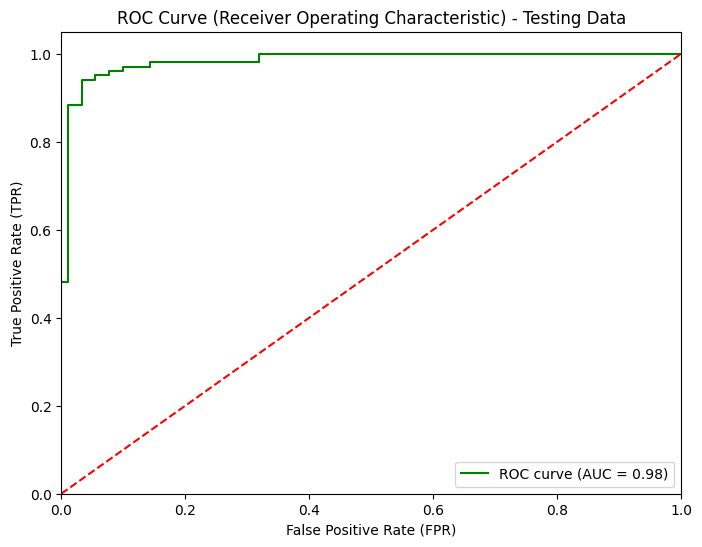

In [ ]:
# Menghitung nilai prediksi probabilitas untuk kelas positif (class 1) pada data testing
y_test_scores = rf.predict_proba(X_test)[:, 1]

# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk data testing
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores)

# Menghitung AUC untuk data testing
auc_test = roc_auc_score(y_test, y_test_scores)

# Memplot kurva ROC untuk data testing
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', label='ROC curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Receiver Operating Characteristic) - Testing Data')
plt.legend(loc='lower right')
plt.show()


kurva ROC diatas memiliki nilai AUC sebesar 0.98 yang menunjukkan bahwa model memiliki kinerja yang sangat baik dalam memisahkan kelas positif dan kelas negatif. Nilai AUC mendekati 1 menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara sampel positif dan negatif

#**Logistic Regression**
Alasan: Cocok untuk masalah klasifikasi biner di mana variabel target memiliki dua kelas, misalnya keberadaan atau ketiadaan penyakit jantung.

Kelebihan: Interpretabilitas yang tinggi, cocok untuk dataset yang relatif linier, efisien dalam penggunaan memori dan komputasi, serta memiliki kemampuan untuk memberikan probabilitas prediksi.

In [ ]:
# Inisialisasi dan latih model regresi logistik
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Melakukan prediksi pada data training
lr_predicted_train = lr_model.predict(X_train)

# Melakukan prediksi pada data testing
lr_predicted_test = lr_model.predict(X_test)

# Menghitung confusion matrix untuk data training
lr_conf_matrix_train = confusion_matrix(y_train, lr_predicted_train)


# Menampilkan confusion matrix untuk data training
print("Confusion Matrix (Data Training):")
print(lr_conf_matrix_train)
print("\n")

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data training
print("Classification Report (Data Training):")
print(classification_report(y_train, lr_predicted_train))

# Menghitung akurasi model untuk data training
lr_acc_score_train = accuracy_score(y_train, lr_predicted_train)

# Menampilkan akurasi model untuk data training
print("Nilai Akurasi untuk model Logistic Regression (Data Training):", lr_acc_score_train * 100, '%\n')


# Menghitung confusion matrix untuk data testing
lr_conf_matrix_test = confusion_matrix(y_test, lr_predicted_test)

# Menampilkan confusion matrix untuk data testing
print("Confusion Matrix (Data Testing):")
print(lr_conf_matrix_test)
print("\n")

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data testing
print("Classification Report (Data Testing):")
print(classification_report(y_test, lr_predicted_test))

# Menghitung akurasi model untuk data testing
lr_acc_score_test = accuracy_score(y_test, lr_predicted_test)

# Menampilkan akurasi model untuk data testing
print("Nilai Akurasi untuk model Logistic Regression (Data Testing):", lr_acc_score_test * 100, '%\n')


Confusion Matrix (Data Training):
[[283  79]
 [ 39 367]]


Classification Report (Data Training):
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       362
           1       0.82      0.90      0.86       406

    accuracy                           0.85       768
   macro avg       0.85      0.84      0.84       768
weighted avg       0.85      0.85      0.85       768

Nilai Akurasi untuk model Logistic Regression (Data Training): 84.63541666666666 %

Confusion Matrix (Data Testing):
[[73 18]
 [ 8 94]]


Classification Report (Data Testing):
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        91
           1       0.84      0.92      0.88       102

    accuracy                           0.87       193
   macro avg       0.87      0.86      0.86       193
weighted avg       0.87      0.87      0.86       193

Nilai Akurasi untuk model Logistic Regression (Data Testing): 86.5284974

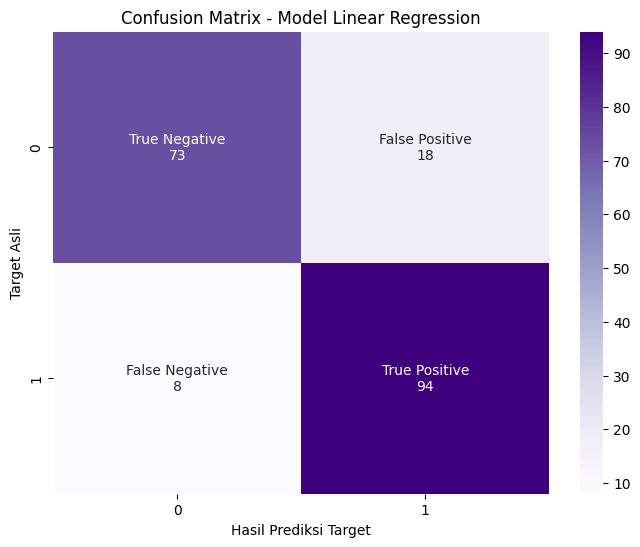

In [ ]:
# Menghitung jumlah TP, TN, FP, FN dari confusion matrix
TP = lr_conf_matrix_test[1, 1]
TN = lr_conf_matrix_test[0, 0]
FP = lr_conf_matrix_test[0, 1]
FN = lr_conf_matrix_test[1, 0]

# Membuat label untuk setiap kotak anotasi
labels = [f'True Negative\n{TN}', f'False Positive\n{FP}', f'False Negative\n{FN}', f'True Positive\n{TP}']

# Heatmap dengan persentase dan label yang sudah diperbaiki
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix_test, annot=np.reshape(labels, (2, 2)), fmt='', cmap='Purples', cbar=True)
plt.title("Confusion Matrix - Model Linear Regression")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()


## **Cross Validation**

In [ ]:
cvscore = cross_val_score(lr_model, X_train, y_train, cv =10, scoring = "accuracy")

In [ ]:
# Menampilkan nilai cross-validation scores
print("Cross-Validation Scores (10-fold):", cvscore)

# Menampilkan rata-rata dari nilai cross-validation scores
print("Rata-rata Cross-Validation Score:", cvscore.mean())

# Menampilkan standar deviasi dari nilai cross-validation scores
print("Standar Deviasi Cross-Validation Score:", cvscore.std())

Cross-Validation Scores (10-fold): [0.84415584 0.80519481 0.81818182 0.83116883 0.77922078 0.88311688
 0.85714286 0.77922078 0.84210526 0.88157895]
Rata-rata Cross-Validation Score: 0.8321086807928912
Standar Deviasi Cross-Validation Score: 0.03526241278413891


Hasil cross-validation basic menunjukkan rata-rata akurasi sebesar 83.21% dengan standar deviasi sebesar 3.53%, menunjukkan konsistensi yang baik dalam prediksi model.

## **Learning Curves**

In [ ]:
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure() #membuat figur untuk menampilak plot learning
    plt.title(" Linear Regression Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

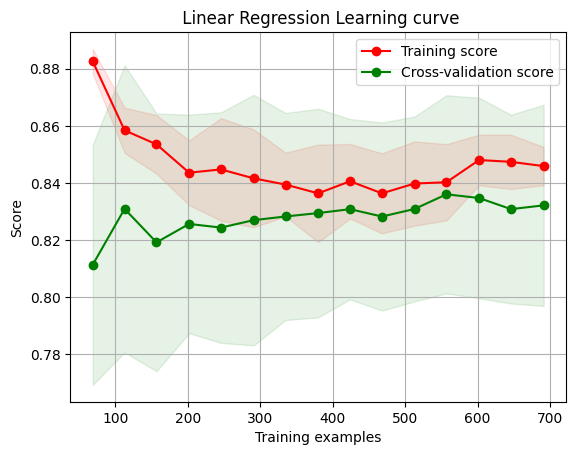

In [ ]:
cv = 10
train_size=np.linspace(.1, 1.0, 15)
Learning_curve_model(X_train, y_train, lr_model, cv, train_size)

Berdasrkan Learning Curves diatas terlihat bahwa nilai dari traing score dab cross validation score mendekati satu sama lain seiring dengan bertambahnya data. dapat disimpulkan model memiliki kinerja yang stabil dan cenderung tidak overfitting ataupun underfitting. sehingga dapat disimpulan model masuk kedalam kategori **Good Fit**

### **Hyperparameter**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
lr_model = LogisticRegression()

# Tentukan daftar hyperparameters yang akan diuji
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Menentukan kekuatan regularisasi
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algoritma solver yang berbeda
}

# Inisialisasi GridSearchCV dengan model Logistic Regression dan daftar hyperparameters
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Lakukan hyperparameter tuning pada data latih
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)

# Buat model Logistic Regression baru dengan parameter terbaik
best_lr_model = LogisticRegression(**best_params)

# Latih model Logistic Regression terbaik pada data latih
best_lr_model.fit(X_train, y_train)


Parameter terbaik: {'C': 1, 'solver': 'liblinear'}


LogisticRegression(C=1, solver='liblinear')

berdasarkan hyperparameter diatas kita mendapatkan parameter terbaik yaitu C = 1, solver = "liblinear" dan langsung kita terapak pada data latih yang kita miliki.

##**Metric Evaluation**

In [ ]:
# Melakukan prediksi pada data testing
y_pred = best_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.9740932642487047
Confusion Matrix:
[[ 88   3]
 [  2 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.97      0.98      0.98       102

    accuracy                           0.97       193
   macro avg       0.97      0.97      0.97       193
weighted avg       0.97      0.97      0.97       193



Dari Metric Evaluasi diatas dapat disimpulkan

nilai akurasi dari model logistic regression adalah 0.974 yang berarti sekitar 97,4% prediksi yang dilakukan oleh model adalah benar. hal ini meningkat dari nilai sebelumnya yaitu 86.5% karena kita telah melakukan cross validation dan mencari hyperparameter.

sehingga berdasarkan hasil dari akurasi model dan hasil lain dari metrik evaluasi seperti precision, F-1score dan support dapat disimpulkan model memiliki kinerja yang baik dalam memprediksi kelas target.



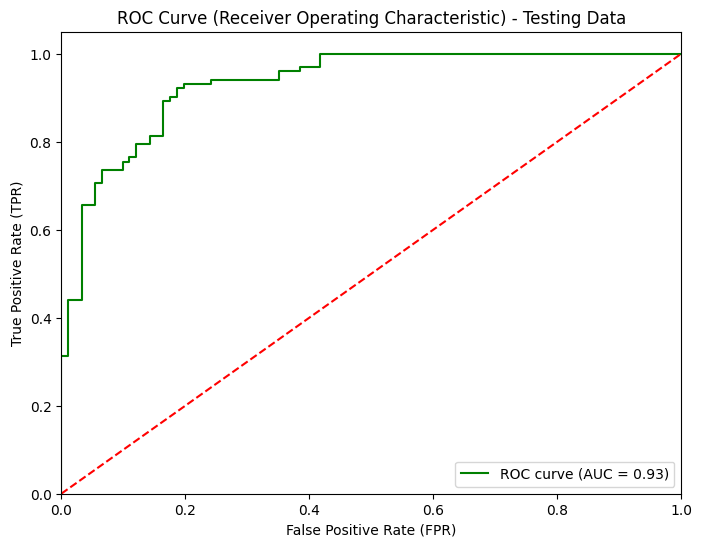

In [ ]:
# Melatih model Logistic Regression
best_model.fit(X_train, y_train)

# Menghitung nilai prediksi probabilitas untuk kelas positif (class 1) pada data testing
y_test_scores = best_lr_model.predict_proba(X_test)[:, 1]

# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk data testing
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores)

# Menghitung AUC untuk data testing
auc_test = roc_auc_score(y_test, y_test_scores)

# Memplot kurva ROC untuk data testing
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', label='ROC curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Receiver Operating Characteristic) - Testing Data')
plt.legend(loc='lower right')
plt.show()


kurva ROC diatas memiliki nilai AUC sebesar 0.93 yang menunjukkan bahwa model memiliki kinerja yang sangat baik dalam memisahkan kelas positif dan kelas negatif. Nilai AUC mendekati 1 menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara sampel positif dan negatif

# **KNN**


KNN dipilih karena sederhana, tidak memerlukan asumsi tentang distribusi data, dan efektif dalam menangani hubungan kompleks antara fitur-fitur dataset "Heart Disease". Dengan pendekatan "memilih dari tetangga terdekat", KNN mudah dipahami dan diimplementasikan tanpa tuning hyperparameter yang rumit.

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Melakukan prediksi pada data training
knn_predicted_train = knn_model.predict(X_train)

# Melakukan prediksi pada data testing
knn_predicted_test = knn_model.predict(X_test)

# Menghitung confusion matrix untuk data training
knn_conf_matrix_train = confusion_matrix(y_train, knn_predicted_train)

# Menampilkan confusion matrix untuk data training
print("Confusion Matrix (Data Training):")
print(knn_conf_matrix_train)
print("\n")

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data training
print("Classification Report (Data Training):")
print(classification_report(y_train, knn_predicted_train))

# Menghitung akurasi model untuk data training
knn_acc_score_train = accuracy_score(y_train, knn_predicted_train)

# Menampilkan akurasi model untuk data training
print("Nilai Akurasi untuk model K-Nearest Neighbors (Data Training):", knn_acc_score_train * 100, '%\n')

# Menghitung confusion matrix untuk data testing
knn_conf_matrix_test = confusion_matrix(y_test, knn_predicted_test)

# Menampilkan confusion matrix untuk data testing
print("Confusion Matrix (Data Testing):")
print(knn_conf_matrix_test)
print("\n")

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data testing
print("Classification Report (Data Testing):")
print(classification_report(y_test, knn_predicted_test))

# Menghitung akurasi model untuk data testing
knn_acc_score_test = accuracy_score(y_test, knn_predicted_test)

# Menampilkan akurasi model untuk data testing
print("Nilai Akurasi untuk model K-Nearest Neighbors (Data Testing):", knn_acc_score_test * 100, '%\n')


Confusion Matrix (Data Training):
[[349  13]
 [ 23 383]]


Classification Report (Data Training):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       362
           1       0.97      0.94      0.96       406

    accuracy                           0.95       768
   macro avg       0.95      0.95      0.95       768
weighted avg       0.95      0.95      0.95       768

Nilai Akurasi untuk model K-Nearest Neighbors (Data Training): 95.3125 %

Confusion Matrix (Data Testing):
[[81 10]
 [14 88]]


Classification Report (Data Testing):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        91
           1       0.90      0.86      0.88       102

    accuracy                           0.88       193
   macro avg       0.88      0.88      0.88       193
weighted avg       0.88      0.88      0.88       193

Nilai Akurasi untuk model K-Nearest Neighbors (Data Testing): 87.56476683937824 %


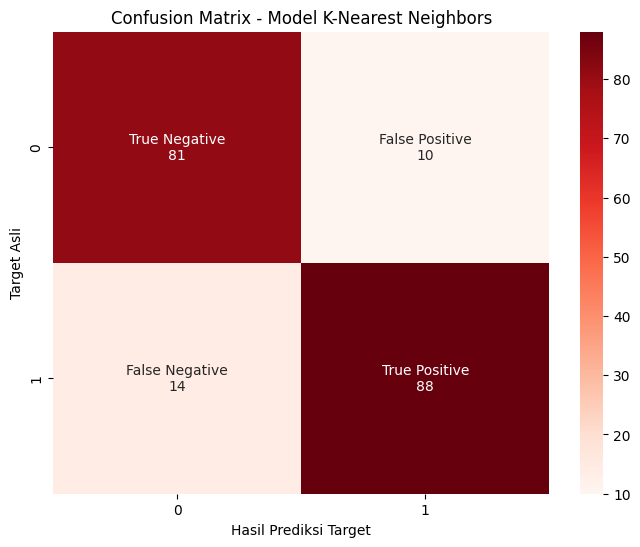

In [ ]:
# Menghitung jumlah TP, TN, FP, FN dari confusion matrix
TP = knn_conf_matrix_test[1, 1]
TN = knn_conf_matrix_test[0, 0]
FP = knn_conf_matrix_test[0, 1]
FN = knn_conf_matrix_test[1, 0]

# Membuat label untuk setiap kotak anotasi
labels = [f'True Negative\n{TN}', f'False Positive\n{FP}', f'False Negative\n{FN}', f'True Positive\n{TP}']

# Heatmap dengan persentase dan label yang sudah diperbaiki
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix_test, annot=np.reshape(labels, (2, 2)), fmt='', cmap='Reds', cbar=True)
plt.title("Confusion Matrix - Model K-Nearest Neighbors")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()


## **Learning Curves**

In [ ]:
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure() #membuat figur untuk menampilak plot learning
    plt.title(" K-Nearest Neighbors curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

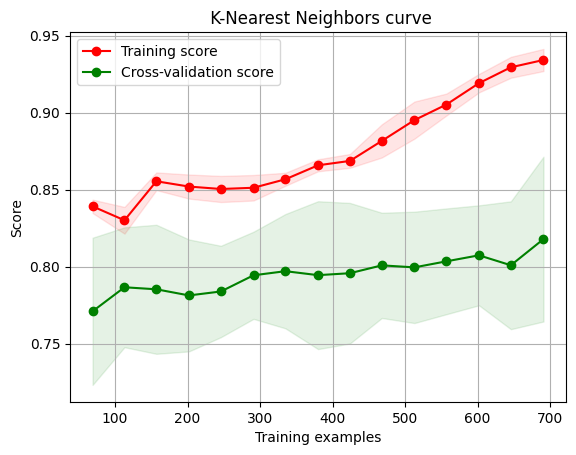

In [ ]:
cv = 10
train_size=np.linspace(.1, 1.0, 15)
Learning_curve_model(X_train, y_train, knn_model, cv, train_size)

Berdasrkan Learning Curves diatas terlihat bahwa nilai dari traing score dab cross validation score mendekati satu sama lain seiring dengan bertambahnya data. dapat disimpulkan model memiliki kinerja yang stabil dan cenderung tidak overfitting ataupun underfitting. sehingga dapat disimpulan model masuk kedalam kategori **Good Fit**

## **Cross validation**

In [ ]:
cvscore = cross_val_score(model_svc, X_train, y_train, cv =10, scoring = "accuracy")

In [ ]:
# Menampilkan nilai cross-validation scores
print("Cross-Validation Scores (10-fold):", cvscore)

# Menampilkan rata-rata dari nilai cross-validation scores
print("Rata-rata Cross-Validation Score:", cvscore.mean())

# Menampilkan standar deviasi dari nilai cross-validation scores
print("Standar Deviasi Cross-Validation Score:", cvscore.std())

Cross-Validation Scores (10-fold): [0.87012987 0.92207792 0.83116883 0.85714286 0.81818182 0.85714286
 0.85714286 0.77922078 0.89473684 0.92105263]
Rata-rata Cross-Validation Score: 0.8607997265892002
Standar Deviasi Cross-Validation Score: 0.04244258239870996



Hasil cross-validation dengan 10-fold menunjukkan rata-rata akurasi sebesar 86.08% dengan standar deviasi sebesar 4.24%, menunjukkan konsistensi yang baik dalam kinerja model.

## **Hyperparameter Tuning**

In [ ]:
# Tentukan model KNN
knn_model = KNeighborsClassifier()

# Tentukan daftar hyperparameters yang akan diuji
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Inisialisasi GridSearchCV dengan model KNN dan daftar hyperparameters
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Lakukan hyperparameter tuning pada data latih
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)


Parameter terbaik: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


## **Metric Evaluation**

In [ ]:
best_knn_model = KNeighborsClassifier(n_neighbors= 9, algorithm = 'auto')
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Melakukan prediksi pada data testing
y_pred = best_knn_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.8652849740932642
Confusion Matrix:
[[76 15]
 [11 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        91
           1       0.86      0.89      0.88       102

    accuracy                           0.87       193
   macro avg       0.87      0.86      0.86       193
weighted avg       0.87      0.87      0.87       193



Dari Metric Evaluasi diatas dapat disimpulkan

nilai akurasi dari model adalah 0.865 yang berarti sekitar 86.5% prediksi yang dilakukan oleh model adalah benar..

sehingga berdasarkan hasil dari akurasi model dan hasil lain dari metrik evaluasi seperti precision, F-1score dan support dapat disimpulkan model memiliki kinerja yang baik dalam memprediksi kelas target.



AUC-ROC Score: 0.9684335272570567


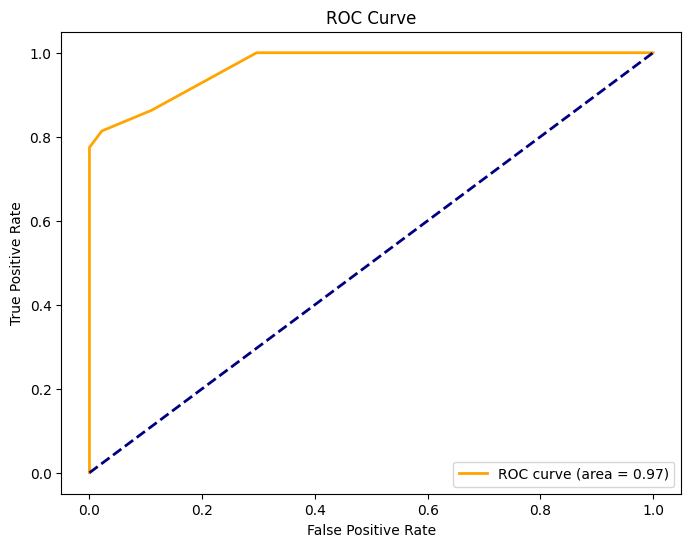

In [ ]:
# Melatih model KNeighborsClassifier
knn_model.fit(X_train, y_train)
# Prediksi probabilitas kelas positif untuk data testing
y_prob = knn_model.predict_proba(X_test)[:, 1]

# Menghitung nilai AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_roc)

# Menghitung false positive rate (FPR) dan true positive rate (TPR) untuk kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


kurva ROC diatas memiliki nilai AUC sebesar 0.97 yang menunjukkan bahwa model memiliki kinerja yang sangat baik dalam memisahkan kelas positif dan kelas negatif. Nilai AUC mendekati 1 menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara sampel positif dan negatif